### Step 1: Loading the datasets

All speeches CSV file (all_speeches.csv)

Sentiment wordlist Excel file (Sentiment-labelled_wordlist-2.xlsx)

### Loaded the two datasets: one CSV with speeches and one Excel file with sentiment-labeled words: into pandas DataFrames and displayed their first few rows.

In [1]:
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


### Step 2: Explore and Clean Data

#### To check?

###### 1.Are dates parsed properly?

###### 2.Are speech texts clean (no missing)?

###### 3.Is the sentiment list organized (positive/negative words tagged)?

### Check date formats (important for time analysis)

Look for missing values

Look at the structure of the speeches and sentiment files

### I  examined the structure, summary statistics, and missing values of both datasets to assess their quality and cleanliness.

In [2]:
def explore_data(speeches_df: pd.DataFrame, sentiment_df: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df.info())
    display(speeches_df.describe())
    display(speeches_df.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df.info())
    display(sentiment_df.describe())
    display(sentiment_df.isnull().sum())

# Run exploration
explore_data(speeches_df, sentiment_df)


--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

,is_gov
count,7721.000000
mean,0.347235
std,0.476122
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
count,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000
mean,0.606959,0.092268,0.076546,0.233247,0.004897,0.006959,0.047423
std,0.488489,0.289441,0.265905,0.422953,0.069815,0.083139,0.212569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

### To Make sure Dates are in the correct format
We expect that the speeches should have a column like date or similar. If yes, we'll convert it properly:

### In the below step, I converted the 'date' column in the speeches dataset to datetime format to ensure consistent date handling.

In [3]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)


,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


### Preprocess text (basic cleaning).

Apply sentiment scoring using the wordlist.

Start time series sentiment analysis.

### Goal is :

##### Clean the text a little (lowercase, remove symbols if needed).

##### Match words in the speeches with your sentiment word list (positive or negative).

##### Calculate a simple Sentiment Score for each speech.

### This prints the column names of the speeches dataset to review its structure or confirm the presence of specific fields.

In [4]:
#Check columns in speeches dataset

print(speeches_df.columns)


Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text'], dtype='object')


### There was a mistake:

##### Edward George was Governor from 1993 to 2003.

##### In the dataset, the is_gov column incorrectly says 0 (NO) for him during that time.

##### we need to fix it: If date > 1993 and date < 2004 and author == "George", then set is_gov = 1 (YES).

### Cleaning the data to fix this

### I corrected the 'is_gov' flag to mark Edward George as Governor (1) for speeches between 1994 and 2003, based on his tenure.

In [5]:
def correct_is_gov_column(speeches_df: pd.DataFrame):
    """
    Correct the 'is_gov' value for Edward George between 1993 and 2003.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with corrected 'is_gov' values.
    """
    # Make sure date is datetime first
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    
    # Apply correction
    condition = (
        (speeches_df['author'].str.lower() == 'george') &
        (speeches_df['date'].dt.year > 1993) &
        (speeches_df['date'].dt.year < 2004)
    )
    speeches_df.loc[condition, 'is_gov'] = 1  # 1 means Governor
    
    return speeches_df

# Correct the is_gov column
speeches_df = correct_is_gov_column(speeches_df)

# Quick check if it worked
display(speeches_df[speeches_df['author'].str.lower() == 'george'].head())


,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,1,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,1,It's a great pleasure to be here in the beauti...
4966,r981119a_BOE,united kingdom,1998-11-19,Speech,george,1,Let me put some of the recent newspaper headli...
4969,r990112a_BOE,united kingdom,1999-01-12,Speech,george,1,I am only too well aware of the pressure curre...
4970,r990118a_BOE,united kingdom,1999-01-18,Speech,george,1,It would be a masterly understatement to descr...


### A quick summary of the cleaning process

We first convert date to datetime if it is not already done?

.str.lower() ensures case-insensitive matching ("George", "george", etc.).

.loc[condition, 'is_gov'] = 1 assigns Governor status (YES).

Then we display some George rows to verify! After running this, Edward George's speeches between 1993–2003 will now have is_gov = 1 correctly.

### I listed all column names in the speeches DataFrame as a Python list to inspect the dataset’s structure or confirm available fields.

### Updated full data cleaning

In [6]:
# Check what columns exist in the speeches dataframe
print(speeches_df.columns.tolist())


['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text']


### I printed the column names of the sentiment wordlist DataFrame as a list to examine its structure or identify key fields.

In [7]:
print(sentiment_df.columns.tolist())

['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


### I created a function to display a quick overview of both datasets, including their first few rows, column names, and a focused preview of key columns (date, author, is_gov) in the speeches DataFrame.

In [8]:
def display_data_overview(speeches_df, sentiment_df):
    print("=== Speeches DataFrame Head ===")
    print(speeches_df.head())
    print("\n=== Sentiment DataFrame Head ===")
    print(sentiment_df.head())
    print("\n=== Speeches DataFrame Columns ===")
    print(speeches_df.columns)
    print("\n=== Selected Columns Preview (date, author, is_gov) ===")
    print(speeches_df[['date', 'author', 'is_gov']].head())


In [9]:
display_data_overview(speeches_df, sentiment_df)


=== Speeches DataFrame Head ===
      reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...  

=== Sentiment DataFrame Head ===
           Word  Negative  Positive  Uncertai

### Build a full sentiment analysis pipeline for analyzing speeches

#### I cleaned and standardized the speeches dataset by:

###### Removing non-letter characters and lowercasing the text,

###### Creating sets of positive and negative sentiment words,

###### Calculating sentiment scores for each speech based on word matches,

###### Standardizing and correcting the 'is_gov' column,

###### Then displaying key columns and sample results to review sentiment analysis output.

In [10]:
import pandas as pd
import re
from IPython.display import display

# Clean text: remove non-letters and lowercase
def clean_text(text):
    return re.sub(r'[^A-Za-z\s]', '', str(text)).lower()

# Prepare sentiment word sets
def prepare_word_sets(sentiment_df):
    pos = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    neg = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return pos, neg

# Calculate sentiment score
def get_sentiment_score(text, pos_words, neg_words):
    words = text.split()
    return sum(w in pos_words for w in words) - sum(w in neg_words for w in words)

# Fix Edward George's governor status
def fix_governor_status(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    mask = df['author'].str.lower().str.contains('george') & df['date'].dt.year.between(1993, 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# Display key info
def display_results(df):
    display(df[['date', 'author', 'is_gov', 'sentiment_score']].head())
    print("\nSample cleaned + scored:")
    print(df[['cleaned_text', 'sentiment_score']].head())

# --- Processing ---

# Standardize 'is_gov' values
speeches_df['is_gov'] = speeches_df['is_gov'].replace({0: 'NO', 1: 'YES'})

# Clean speech text
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text)

# Fix governor status
speeches_df = fix_governor_status(speeches_df)

# Prepare word sets and score
pos_words, neg_words = prepare_word_sets(sentiment_df)
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda t: get_sentiment_score(t, pos_words, neg_words)
)

# Display final output
display_results(speeches_df)


,date,author,is_gov,sentiment_score
0,1990-11-28,fraser,NO,-38
1,1991-10-03,fraser,NO,-29
2,1992-03-14,fraser,NO,22
3,1992-05-29,fraser,NO,-11
4,1992-08-17,fraser,NO,-12



Sample cleaned + scored:
                                        cleaned_text  sentiment_score
0  they would no doubt argue that to have two obj...              -38
1  today i wish to talk about real interest rates...              -29
2  i welcome this opportunity to talk about prosp...               22
3  it is a pleasure to have this opportunity to a...              -11
4  as a longtime fan of don sanders i am delighte...              -12


### Lexicon Sentiment Score Over Time

#### I calculated and plotted the average sentiment score (lexicon score) for central bank speeches over time, visualizing trends across years with a line graph.



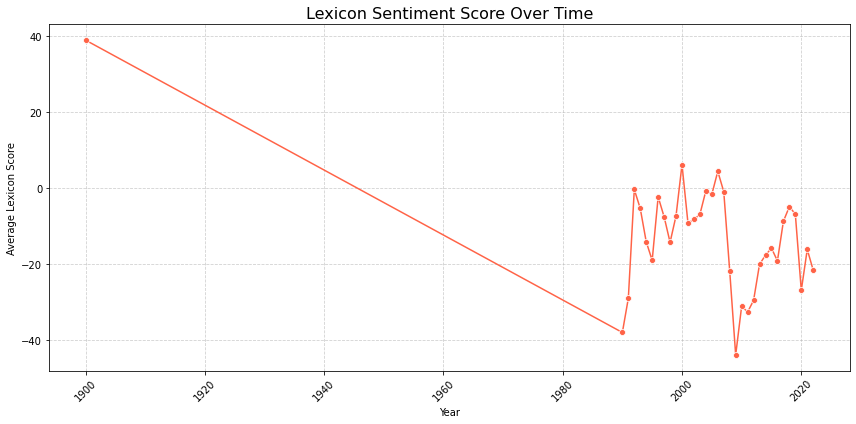

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date if not already done
speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')

# Group by year
yearly_lexicon = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()
yearly_lexicon.columns = ['year', 'avg_lexicon_score']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_lexicon, x='year', y='avg_lexicon_score', marker='o', color='tomato')
plt.title('Lexicon Sentiment Score Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Lexicon Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### I performed several data analysis tasks:

##### Displayed descriptive statistics for the dataset.

###### Detected outliers in the 'sentiment_score' column using the IQR method.

###### Visualized sentiment score distribution with a boxplot, highlighting outliers.

###### Generated a word cloud based on the speech texts to visualize the most frequent words.

Descriptive Statistics:
       sentiment_score
count      7721.000000
mean        -14.519881
std          44.691486
min        -979.000000
25%         -32.000000
50%          -7.000000
75%           9.000000
max         486.000000
Outliers detected:
          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author is_gov  \
40                                                       macfarlane    YES   
83   

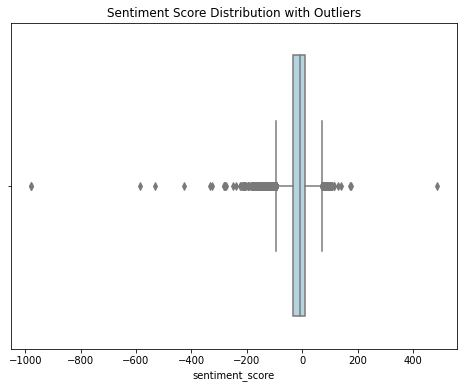

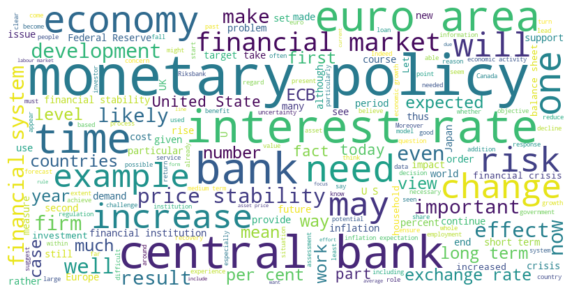

In [12]:
from wordcloud import WordCloud

# Assuming speeches_df is already loaded and cleaned

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(speeches_df.describe())

# 2. Identify and visualize outliers using IQR
def detect_outliers_iqr(df, column):
    """Detect outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualize outliers for 'sentiment_score'
outliers_df = detect_outliers_iqr(speeches_df, 'sentiment_score')
print("Outliers detected:")
print(outliers_df)

# 3. Boxplot to visualize outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=speeches_df['sentiment_score'], color='lightblue')
plt.title('Sentiment Score Distribution with Outliers')
plt.show()

# 4. Create a word cloud from the speech text
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the speeches
generate_word_cloud(speeches_df['text'])



### I cleaned the 'text' column by removing special characters, extra spaces, and non-alphanumeric characters, then combined all speeches into one string. Finally, generated and visualized a word cloud from the cleaned speech texts to highlight frequently used terms.

0    They would no doubt argue that to have two obj...
1    Today I wish to talk about real interest rates...
2    I welcome this opportunity to talk about prosp...
3    It is a pleasure to have this opportunity to a...
4    As a long-time fan of Don Sanders, I am deligh...
Name: text, dtype: object


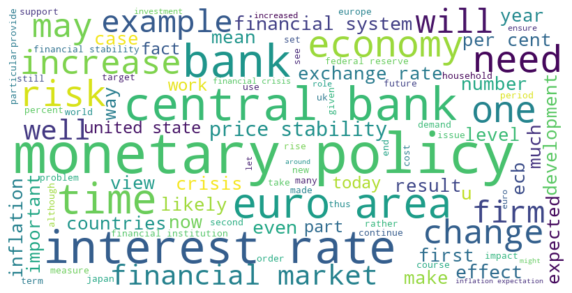

In [13]:
# Ensure the 'text' column is not empty or missing
print(speeches_df['text'].head())

# 1. Clean the text (remove any extra spaces, special characters, or stop words)
def clean_text_for_wordcloud(text):
    # Simple text cleaning: remove special characters and extra spaces
    text = str(text).lower()
    text = text.replace('\n', ' ')  # Remove line breaks
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Keep only alphanumeric characters and spaces
    return text

# Clean the 'text' column in the dataframe
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text_for_wordcloud)

# 2. Combine all the speeches into a single string
all_text = ' '.join(speeches_df['cleaned_text'])

# 3. Generate the word cloud
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=None, max_words=100).generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

# Generate the word cloud from cleaned text
generate_word_cloud(all_text)


### correlation matrix and heatmap, for visualizing relationships between numeric features in the speeches_df, including sentiment_score.

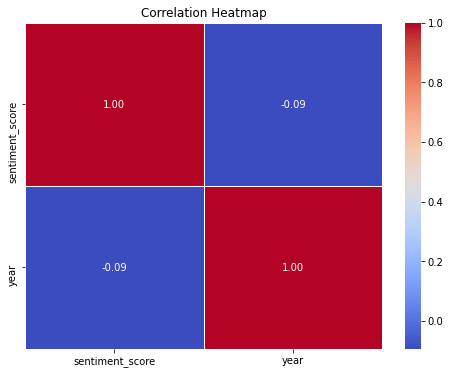

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (using your 'speeches_df' for example)
# If you have other numerical columns, feel free to add them to the DataFrame.
# For example, sentiment_score, date (converted to numerical), or any other relevant metrics.
speeches_df['date'] = pd.to_datetime(speeches_df['date'])  # Ensure 'date' is datetime format
speeches_df['year'] = speeches_df['date'].dt.year  # Extract year for analysis

# Compute correlations
correlation_matrix = speeches_df[['sentiment_score', 'year']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### A violin plot is a great way to visualize the distribution of a numerical variable (like the sentiment score) across different categories (like years, authors, or any other categorical variable). It combines aspects of both a box plot and a density plot, making it useful for understanding the distribution, spread, and outliers in the data.

#### I created a violin plot to visualize the distribution of sentiment scores by year, using a soft pastel color palette, and included labels and titles for better clarity.

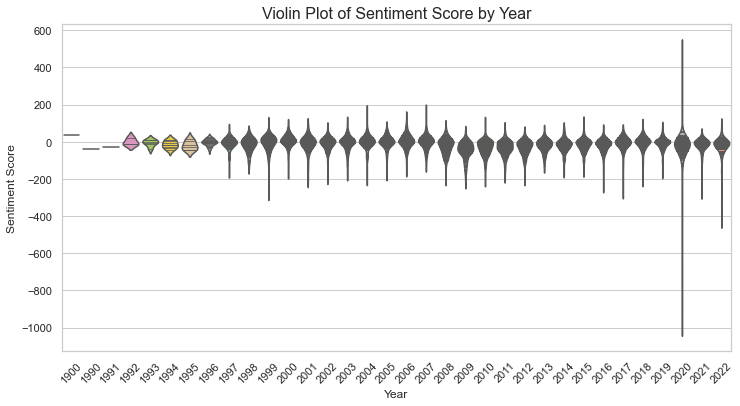

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean, neutral theme
sns.set_theme(style="whitegrid")

# Create the violin plot with a soft pastel palette
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='sentiment_score', data=speeches_df, 
               palette='Set2', inner='stick', scale='width')

# Adding labels and title
plt.title('Violin Plot of Sentiment Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()


### I defined a function to detect and display outliers based on the IQR method for specified columns, then applied it to identify outliers in the 'sentiment_score' and 'year' columns of the speeches dataset.

In [16]:
def display_outliers(df, columns):
    """Detect and display IQR-based outliers for specified columns."""
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))
    display(df[outliers.any(axis=1)])

# Use the function
display_outliers(speeches_df, ['sentiment_score', 'year'])


,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,year
40,r970812a_BOA,australia,1997-08-12,,macfarlane,YES,It is a pleasure to be in Perth to address the...,it is a pleasure to be in perth to address the...,71,1997
83,r030606a_BOA,australia,2003-06-06,,macfarlane,YES,The Proof and Official Hansard transcripts of ...,the proof and official hansard transcripts of ...,-180,2003
151,r110211a_BOA,australia,2011-02-11,,stevens,YES,Hansard transcripts of public hearings are mad...,hansard transcripts of public hearings are mad...,-140,2011
157,r110826a_BOA,australia,2011-08-26,,stevens,YES,Terms of reference for the inquiry: To inquire...,terms of reference for the inquiry to inquire ...,-184,2011
244,r190809a_BOA,australia,2019-08-09,Opening Statement to the House of Repr...,lowe,YES,To inquire into and report on: Good morning ev...,to inquire into and report on good morning eve...,89,2019
...,...,...,...,...,...,...,...,...,...,...
7369,r160926a_FOMC,united states,2016-09-26,Next Steps in the Evolution of Stress Testing,tarullo,NO,Supervisory stress testing has become a corner...,supervisory stress testing has become a corner...,-249,2016
7389,r161202a_FOMC,united states,2016-12-02,Financial Regulation Since the Crisis,tarullo,NO,"Last summer, when I accepted President Loretta...",last summer when i accepted president loretta ...,-145,2016
7404,r170404a_FOMC,united states,2017-04-04,Departing Thoughts,tarullo,NO,Tomorrow is my last day at the Federal Reserve...,tomorrow is my last day at the federal reserve...,-182,2017
7452,r180403a_FOMC,united states,2018-04-03,An Update on the Federal Reserve's Financial S...,brainard,NO,The Federal Reserve's work on financial stabil...,the federal reserves work on financial stabili...,-101,2018


### Visualizing Outliers (Boxplot)
boxplots to visually confirm the presence of outliers in sentiment_score or other numerical features.

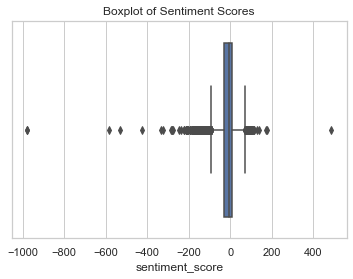

In [17]:
sns.boxplot(x='sentiment_score', data=speeches_df)
plt.title('Boxplot of Sentiment Scores')
plt.show()

### Skewness and Kurtosis

### I calculated the skewness and kurtosis of the 'sentiment_score' column to assess the distribution's asymmetry (skewness) and the presence of extreme values or outliers (kurtosis).

In [18]:
skewness = speeches_df['sentiment_score'].skew()
kurtosis = speeches_df['sentiment_score'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


Skewness: -3.861249948031232, Kurtosis: 66.84195249232052


### Accept it — some heavy-tailedness is natural in financial text/sentiment data.

In [19]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Srila\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Vader to score sentiment

### This code uses VADER to analyze the sentiment of speech texts, classifying them as 'Positive', 'Negative', or 'Neutral' based on the compound score. It adds the sentiment labels to the speeches_df DataFrame under the vader_sentiment column and previews the results.

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Apply sentiment scoring
def vader_label(text):
    scores = vader.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis to text column
speeches_df['vader_sentiment'] = speeches_df['text'].apply(vader_label)

# Preview results
print(speeches_df[['text', 'vader_sentiment']].head())


                                                text vader_sentiment
0  They would no doubt argue that to have two obj...        Positive
1  Today I wish to talk about real interest rates...        Positive
2  I welcome this opportunity to talk about prosp...        Positive
3  It is a pleasure to have this opportunity to a...        Positive
4  As a long-time fan of Don Sanders, I am deligh...        Positive


### Vader sentiment provides one overall sentiment score for each speech (-1 to 1).



### The code defines a function to calculate positive, negative, and neutral word counts using VADER scores and applies it to the speeches_df DataFrame. It creates new columns for each sentiment count and previews the results.

In [22]:
def vader_word_counts(text):
    """Returns the count of positive, negative, and neutral words in text."""
    scores = vader.polarity_scores(str(text))  # Use the 'vader' object
    total_words = len(text.split()) if text else 0  # Handle empty text safely
    pos_count = round(scores['pos'] * total_words)
    neg_count = round(scores['neg'] * total_words)
    neu_count = round(scores['neu'] * total_words)
    return pd.Series([pos_count, neg_count, neu_count])

# Apply function to get word counts
speeches_df[['vader_pos_count', 'vader_neg_count', 'vader_neu_count']] = speeches_df['text'].apply(vader_word_counts)

# Preview results
print(speeches_df[['text', 'vader_pos_count', 'vader_neg_count', 'vader_neu_count']].head())


                                                text  vader_pos_count  \
0  They would no doubt argue that to have two obj...              493   
1  Today I wish to talk about real interest rates...              406   
2  I welcome this opportunity to talk about prosp...              489   
3  It is a pleasure to have this opportunity to a...              423   
4  As a long-time fan of Don Sanders, I am deligh...              448   

   vader_neg_count  vader_neu_count  
0              355             2778  
1              189             2458  
2              201             2709  
3              157             3261  
4              253             3446  


### Visualisation of the correlation of speeches with sentiment score using VADER scores

### created a stacked bar chart showing the VADER sentiment word counts (positive, negative, and neutral) for the first 5 speeches in the speeches_df dataset. 

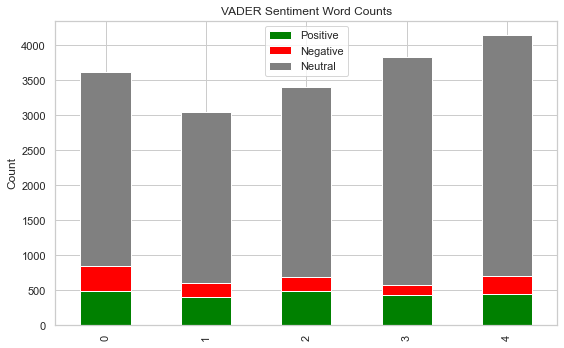

In [23]:
import matplotlib.pyplot as plt

# Sample first 5 speeches
sample_df = speeches_df.head(5)

# Plot histogram with VADER word counts
sample_df[['vader_pos_count', 'vader_neg_count', 'vader_neu_count']].plot(
    kind='bar', stacked=True, figsize=(8, 5), 
    color=['green', 'red', 'gray']
)
plt.title('VADER Sentiment Word Counts')
plt.ylabel('Count')
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.tight_layout()
plt.show()

### Applying the VADER and Lexicon scores to UK only speeches


### Printed the unique values in the 'country' column of the speeches_df DataFrame. This helps to identify all the distinct entries (including variations in capitalization or spelling) for the 'country' column in the dataset.

In [36]:
print(speeches_df['country'].unique())


['australia' 'canada' 'euro area' 'japan' 'sweden' 'switzerland'
 'united kingdom' 'united states']


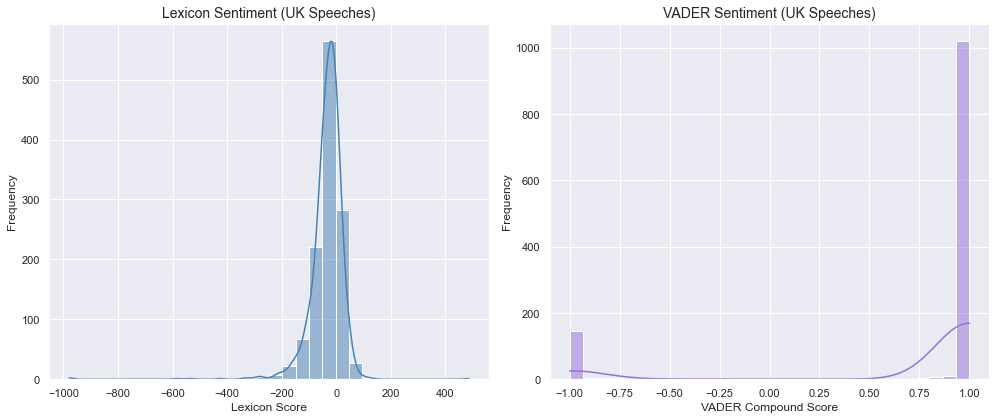

In [40]:
# Filter for United Kingdom speeches only
uk_df = speeches_df[speeches_df['country'].str.lower() == 'united kingdom'].copy()

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Recalculate VADER sentiment from cleaned_text (if needed)
uk_df['vader_sentiment'] = uk_df['cleaned_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Ensure lexicon sentiment score is numeric
uk_df['sentiment_score'] = pd.to_numeric(uk_df['sentiment_score'], errors='coerce')

# Plotting
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Lexicon Sentiment Histogram
sns.histplot(uk_df['sentiment_score'], kde=True, bins=30, color='steelblue', ax=axes[0])
axes[0].set_title('Lexicon Sentiment (UK Speeches)', fontsize=14)
axes[0].set_xlabel('Lexicon Score')
axes[0].set_ylabel('Frequency')

# Plot 2: VADER Sentiment Histogram
sns.histplot(uk_df['vader_sentiment'], kde=True, bins=30, color='mediumpurple', ax=axes[1])
axes[1].set_title('VADER Sentiment (UK Speeches)', fontsize=14)
axes[1].set_xlabel('VADER Compound Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
